# Check dataflow

Setup local code into PYTHONPATH

In [1]:
import sys
sys.path.insert(0, "../code")

Install visualization package dependency

In [2]:
# !pip install --upgrade git+https://github.com/vfdev-5/ImageDatasetViz.git 

Import datasets and dataloaders

In [3]:
from dataflow.datasets import get_train_dataset, get_val_dataset, get_train_noval_sbdataset

In [4]:
from dataflow.dataloaders import get_train_val_loaders

### Check datasets

In [9]:
import os

assert 'DATASET_PATH' in os.environ
data_path = os.environ['DATASET_PATH']

In [10]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


from dataflow import render_mask
from image_dataset_viz import render_datapoint

In [11]:
train_ds = get_train_dataset(data_path)
dp = train_ds[0]
len(train_ds), dp.keys(), dp['image'].shape, dp['mask'].shape

(1464, dict_keys(['image', 'mask']), (281, 500, 3), (281, 500))

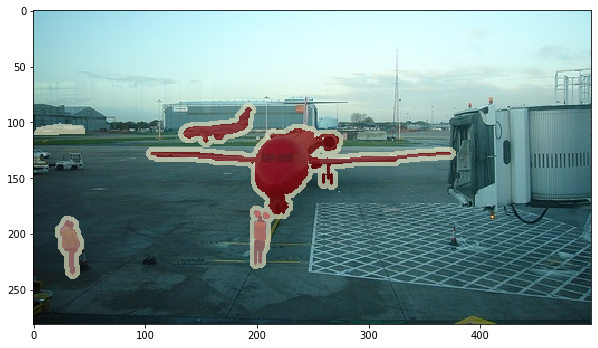

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(render_datapoint(dp['image'], render_mask(dp['mask'])))

In [13]:
val_ds = get_val_dataset(data_path)
dp = val_ds[0]
len(val_ds), dp.keys(), dp['image'].shape, dp['mask'].shape

(1449, dict_keys(['image', 'mask']), (366, 500, 3), (366, 500))

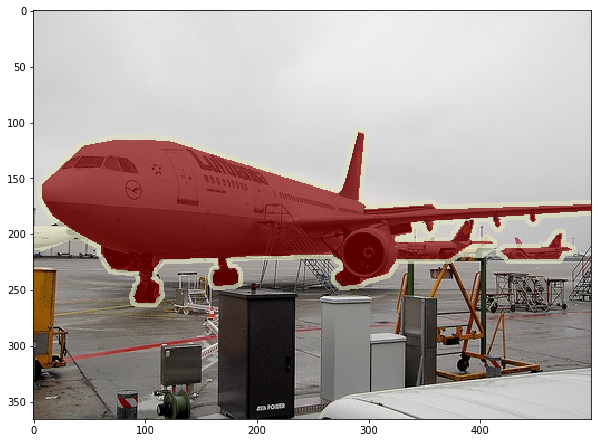

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(render_datapoint(dp['image'], render_mask(dp['mask'])))

In [16]:
assert 'SBDATASET_PATH' in os.environ
sbdata_path = os.environ['SBDATASET_PATH']

In [17]:
sbd_ds = get_train_noval_sbdataset(sbdata_path)
dp = sbd_ds[0]
len(sbd_ds), dp.keys(), dp['image'].shape, dp['mask'].shape

(5623, dict_keys(['image', 'mask']), (442, 500, 3), (442, 500))

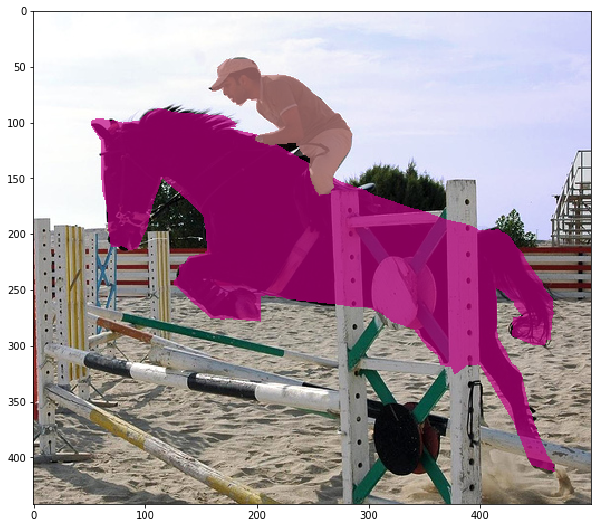

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(render_datapoint(dp['image'], render_mask(dp['mask'])))

### Check dataloaders

In [19]:
# !pip install albumentations

In [20]:
import cv2
import albumentations as A

from dataflow.transforms import ToTensor, ignore_mask_boundaries
from dataflow import make_grid
from dataflow.transforms import denormalize

In [21]:
train_transforms = A.Compose([
    A.RandomScale(scale_limit=(0.0, 1.5), interpolation=cv2.INTER_CUBIC, p=1.0),
    A.PadIfNeeded(513, 513, border_mode=cv2.BORDER_CONSTANT),
    A.RandomCrop(513, 513),
    A.HorizontalFlip(),
    A.Blur(blur_limit=3),

    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ignore_mask_boundaries,
    ToTensor(),
])

val_transforms = A.Compose([
    A.PadIfNeeded(513, 513, border_mode=cv2.BORDER_CONSTANT),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ignore_mask_boundaries,
    ToTensor(),
])

In [22]:
train_loader, val_loader, train_eval_loader = get_train_val_loaders(root_path=data_path, 
                                                                    train_transforms=train_transforms,
                                                                    val_transforms=val_transforms,
                                                                    batch_size=4,
                                                                    val_batch_size=4,
                                                                    with_sbd=sbdata_path,
                                                                    random_seed=12)

In [23]:
train_loader_iter = iter(train_loader)
val_loader_iter = iter(val_loader)
train_eval_loader_iter = iter(train_eval_loader)

Training data

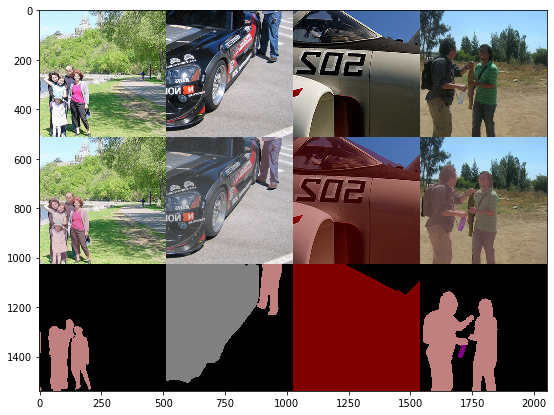

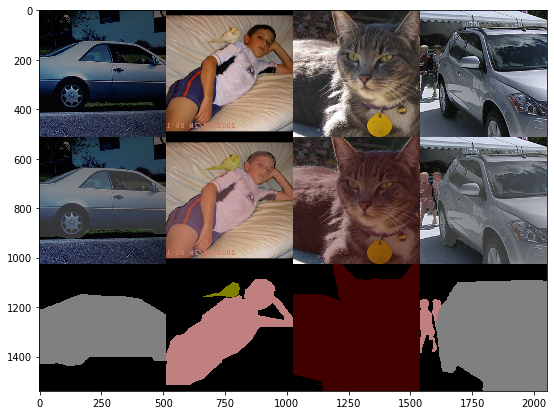

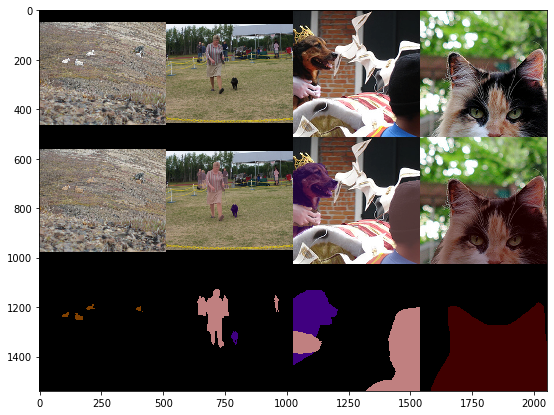

In [27]:
from functools import partial


for _ in range(3):
    train_batch = next(train_loader_iter)

    batch_x = train_batch['image']
    batch_y = train_batch['mask']
    
    plt.figure(figsize=(15, 7))
    grid_pred_gt = make_grid(batch_x, batch_y, 
                             img_denormalize_fn=partial(denormalize, 
                                                        mean=(0.485, 0.456, 0.406), 
                                                        std=(0.229, 0.224, 0.225)))
    plt.imshow(grid_pred_gt)

Validation data

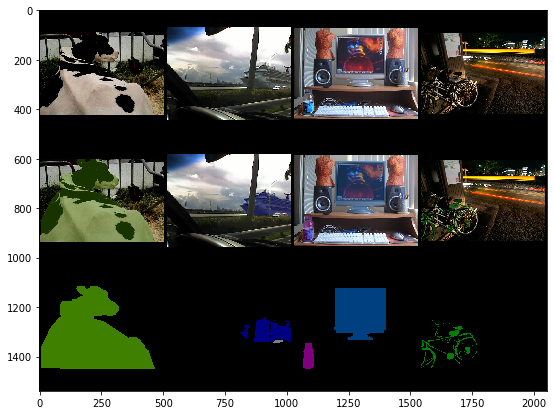

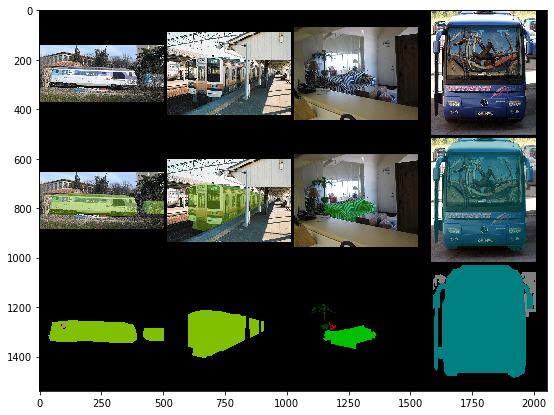

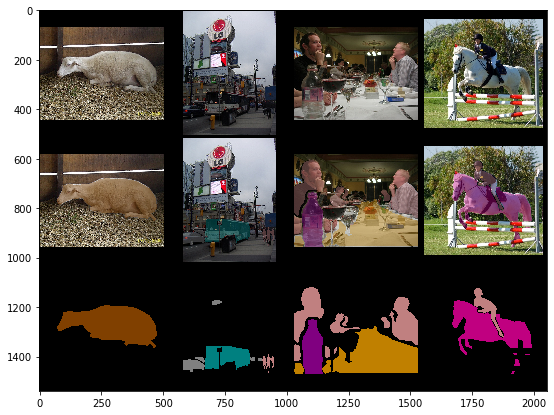

In [29]:
from functools import partial


for _ in range(3):
    val_batch = next(val_loader_iter)

    batch_x = val_batch['image']
    batch_y = val_batch['mask']
    
    plt.figure(figsize=(15, 7))
    grid_pred_gt = make_grid(batch_x, batch_y, 
                             img_denormalize_fn=partial(denormalize, 
                                                        mean=(0.485, 0.456, 0.406), 
                                                        std=(0.229, 0.224, 0.225)))
    plt.imshow(grid_pred_gt)

Training data for validation

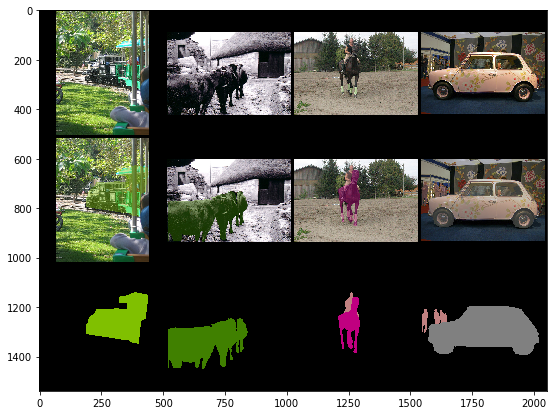

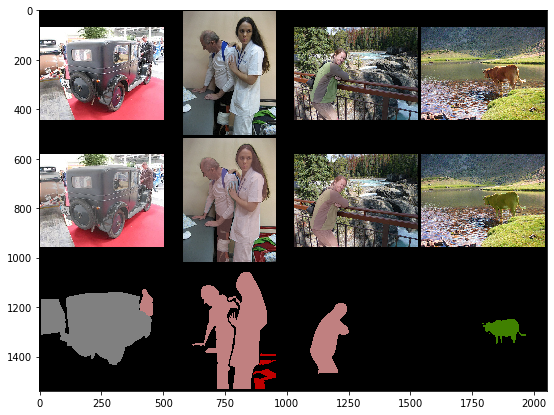

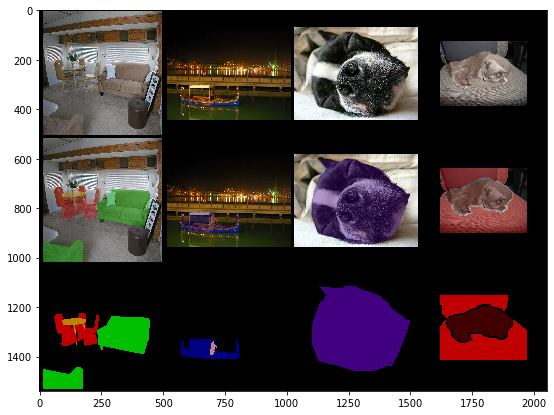

In [30]:
from functools import partial


for _ in range(3):
    train_eval_batch = next(train_eval_loader_iter)

    batch_x = train_eval_batch['image']
    batch_y = train_eval_batch['mask']
    
    plt.figure(figsize=(15, 7))
    grid_pred_gt = make_grid(batch_x, batch_y, 
                             img_denormalize_fn=partial(denormalize, 
                                                        mean=(0.485, 0.456, 0.406), 
                                                        std=(0.229, 0.224, 0.225)))
    plt.imshow(grid_pred_gt)